# Workshop No. 3
As you are becoming an expert on understand systems, it is the time to create an expert system.

Also, as you shoud know, you professor love movies a lot. So, you want to help him to choose next movies to watch. In this sense, you will take information for next movies from a popular website called IMDb where there is different information about movies and opinions.

However, you do not want to spend money to get movies information using a webAPI. But, as you are a good computer engineer, you know there is a technique called web scrapping, and you could get information using HTML from an website, and put this information into a DataFrame just to make easier data processing.

In this case, you are gonna use request package to get HTML code from IMDb site, beautiful soup package to make web scrapping, and pandas to have a dataframe to handle data.

In [1]:
!pip install --upgrade pip
!pip install requests
!pip install beautifulsoup4
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


# 1. Get Movies Data
In the link IMDb Upcoming Relases there are next movies with some related data as genre or star actors. So, using html tags, you could take information and save it into python variables. At the end, here you want to have a DataFrame with movies information.

In [3]:
# Importar bibliotecas necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_web_html(url: str) -> BeautifulSoup:
    """
    Esta función obtiene el HTML de un sitio web utilizando scraping.

    Args:
        url: URL para hacer scraping.

    Returns:
        Un objeto BeautifulSoup con el HTML.
    """
    # Cabeceras para evitar el error 403, porque IMDb bloquea solicitudes de bots
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    # Obtener HTML y guardarlo en una variable
    response = requests.get(url, headers=headers)
    return BeautifulSoup(response.text, "html.parser")

def get_title_year(movie_data: BeautifulSoup) -> tuple:
    """
    Esta función obtiene el título, el año y el enlace de los datos de una película utilizando scraping.

    Args:
        movie_data: Objeto BeautifulSoup con los datos de la película.

    Returns:
        Una tupla con el título, el año y el enlace.
    """
    # Procesar el título principal de la subdivisión
    base_url = "https://www.imdb.com"
    ref_data = movie_data.find("a")
    title = ref_data.text.split("(")[0].strip()
    year = ref_data.text.split("(")[1].replace(")", "")
    link = base_url + ref_data["href"]
    return title, year, link

def get_genre_actors(movie_data: BeautifulSoup) -> list:
    """
    Esta función obtiene el género y los actores de los datos de una película utilizando scraping.

    Args:
        movie_data: Objeto BeautifulSoup con los datos de la película.

    Returns:
        Una lista con el género y los actores.
    """
    # Procesar etiquetas ul para obtener el género y los actores
    data = []
    ul_tags = movie_data.find_all("ul")
    for ul_tag in ul_tags:
        temp = []
        for li_tag in ul_tag.find_all("li"):
            temp.append(li_tag.find("span").get_text())
        data.append(", ".join(temp))
    return data

def generate_dataframe(url: str) -> pd.DataFrame:
    """
    Este método genera un DataFrame con datos de películas de IMDb.

    Args:
        url: URL para hacer scraping.

    Returns:
        Un DataFrame con los datos de las películas.
    """
    # Definición de la estructura de datos de las películas
    imdb = get_web_html(url)
    movies = []
    movies_metadata = ["Title", "Year", "Genre", "Actors"]

    # Procesar HTML utilizando scraping y acceder a cada división con la clase ipc-metadata-list-summary-item__tc
    movies_html = imdb.find_all("div", class_="ipc-metadata-list-summary-item__tc")
    for movie in movies_html:
        # Obtener datos de cada película en una estructura HTML limpia
        movie_data = BeautifulSoup(str(movie), "html.parser")

        # Obtener datos de la película
        title, year, link = get_title_year(movie_data)
        data = get_genre_actors(movie_data)

        # Crear un diccionario para tener una estructura de datos de la película limpia
        movie_clean_data = {
            "Title": title,
            "Year": year,
            "Genre": data[0] if data else "",
            "Actors": data[1] if len(data) > 1 else "",
        }
        # Crear una lista de diccionarios para crear un DataFrame
        movies.append(movie_clean_data)

    # Crear el DataFrame de películas
    return pd.DataFrame(movies, columns=movies_metadata)

# ================================ MAIN =================================== #
# URL para hacer scraping
url = "https://www.imdb.com/calendar/?ref_=rlm&region=US&type=MOVIE"
movies_df = generate_dataframe(url)
print(movies_df.head(3))

                     Title  Year                         Genre  \
0  Furiosa: A Mad Max Saga  2024     Action, Adventure, Sci-Fi   
1       The Garfield Movie  2024  Animation, Adventure, Comedy   
2                    Sight  2023     Biography, Drama, History   

                                              Actors  
0  Anya Taylor-Joy, Chris Hemsworth, Tom Burke, A...  
1  Chris Pratt, Samuel L. Jackson, Hannah Wadding...  
2  Terry Chen, Greg Kinnear, Natasha Mumba, Fionn...  


# 2. Time to build a Decision Tree
In order to create an expert system, you must define a decision tree. It means, a sequence of conditionals in order to get a result, it is like to build a flowchart composed for a lot of conditionals.

In this part, you must to go to any site like draw.io and create a flowchart about how you think is the best decision process: what questions do you want to make?

Remember, make the right questions is a pretty important step at any taks you want to do.

As follows is the algorithm used in the expert system (replace image called expert_system.png):

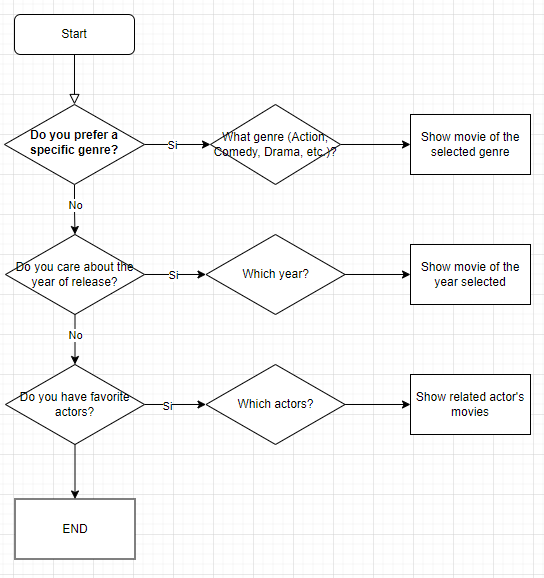

## 2.1 Your proposal
The goal of this expert system is to recommend movies based on the user's preferences. To accomplish this, I have designed a decision tree that guides the user through a series of key questions to identify their tastes and preferences. Justifications for the selection and order of the questions, system components, system sensitivity, and other important aspects are detailed below.

**Justification for the Selection and Order of the Questions**


1.   Film Genre:
*   Question: Do you prefer a specific genre?
*   Justification: Genre is one of the most determining criteria in the selection of a film. People often have favorite genres that significantly determine their interest in watching a movie. Asking about genre at the beginning helps to filter a large number of options effectively.

2.   Year of Launch:
*   Question: Do you care about the year of release?
*   Justification: The year of release may be crucial for some users who prefer more recent movies or have an interest in movies from a specific decade. This question helps to refine the search according to the user's time preferences.

3.   Favorite Actors:
*   Question: Do you have favorite actors?
*   Justification: Many viewers choose movies based on the lead actors. Including this question allows the system to recommend movies with the user's preferred actors, increasing the likelihood of satisfaction.







# 3. Put your expert system at work
Now it is the time to write code in order to create your first and classical expert system. Here it is important to use conditionals, and based on conditionals apply filters in pandas dataframe.

In [4]:
def recommend_movies(df: pd.DataFrame):
    # Ask about genre preference
    genre_preference = input("Do you prefer a specific genre? (yes/no): ").strip().lower()
    if genre_preference == "yes":
        genre = input("Which genre? (e.g., Action, Comedy, Drama, etc.): ").strip().capitalize()
        df = df[df['Genre'].str.contains(genre, case=False, na=False)]

    # Ask about release year preference
    year_preference = input("Do you care about the release year? (yes/no): ").strip().lower()
    if year_preference == "yes":
        year = input("Which year? (e.g., 2020, 2021, etc.): ").strip()
        df = df[df['Year'].str.contains(year, na=False)]

    # Ask about favorite actors
    actors_preference = input("Do you have favorite actors? (yes/no): ").strip().lower()
    if actors_preference == "yes":
        actors = input("Which actors? (separate by commas, e.g., Leonardo DiCaprio, Meryl Streep): ").strip().split(',')
        for actor in actors:
            df = df[df['Actors'].str.contains(actor.strip(), case=False, na=False)]

    # Display recommendations
    if df.empty:
        print("No movies found that match your preferences.")
    else:
        print("Here are the recommended movies based on your preferences:")
        print(df)

# Call the recommendation function
recommend_movies(movies_df)

Do you prefer a specific genre? (yes/no): yes
Which genre? (e.g., Action, Comedy, Drama, etc.): action
Do you care about the release year? (yes/no): no
Do you have favorite actors? (yes/no): no
Here are the recommended movies based on your preferences:
                                                Title  Year  \
0                             Furiosa: A Mad Max Saga  2024   
6                                       Terra Infirma  2024   
11                                               1992  2024   
15                              Bad Boys: Ride or Die  2024   
18                          Kyle and the Last Emerald  2024   
24                                            Latency  2024   
31                                             Thelma  2024   
38                                              Midas  2024   
40                                    Operation Dagon  2024   
43                                               Kill  2023   
46                                           Boneyard 